In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file='S02-hw-dataset.csv'
data = pd.read_csv(file, sep=',')
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [2]:
data.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [3]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool

In [4]:
induk1 = data['user_id'].duplicated()
induk2 = data['age'] < 1
induk3 = data['age'] > 100
induk4 = data['age'].isna()
induk5 = data['purchases'] < 0
induk6 = data['revenue'] < 0
induk7 = (data['purchases'] <= 0) * (data['revenue'] > 0)
induk = induk1 + induk2 + induk3 + induk4 + induk5 + induk6 + induk7
badData = data[induk]
badData

,user_id,age,country,purchases,revenue
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
12,13,NaN,US,9,630
40,10,24.0,RU,7,511


По полученным данным видно, что 4 из 40 записей датасета (10% от датасета) не удовлетворяют качествам данных, пригодных для последующей обработки. Нарушена полнота (№4, 12), уникальность (№ 40) и валидность (№5)

In [5]:
data.value_counts('country')

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [47]:
data.value_counts('age')

age
24.0     5
28.0     2
32.0     2
31.0     2
47.0     2
52.0     2
39.0     2
35.0     2
21.0     1
20.0     1
18.0     1
5.0      1
26.0     1
22.0     1
23.0     1
25.0     1
36.0     1
42.0     1
34.0     1
33.0     1
45.0     1
43.0     1
46.0     1
51.0     1
54.0     1
55.0     1
57.0     1
120.0    1
Name: count, dtype: int64

In [48]:
groups = data.groupby('country')
print(groups['age'].mean())
print(groups['revenue'].sum())
print(groups['revenue'].count())
print(groups['revenue'].mean())

country
CN    24.000000
DE    34.600000
FR    46.250000
RU    30.076923
US    36.714286
Name: age, dtype: float64
country
CN     2108
DE     8673
FR     8111
RU    10271
US     4459
Name: revenue, dtype: int64
country
CN     2
DE     6
FR    12
RU    13
US     8
Name: revenue, dtype: int64
country
CN    1054.000000
DE    1445.500000
FR     675.916667
RU     790.076923
US     557.375000
Name: revenue, dtype: float64


По полученным данным мы видим, что больше всего покупают товар жители FR и RU, однако больше выручки оставляют  покупатели из CN и DE.

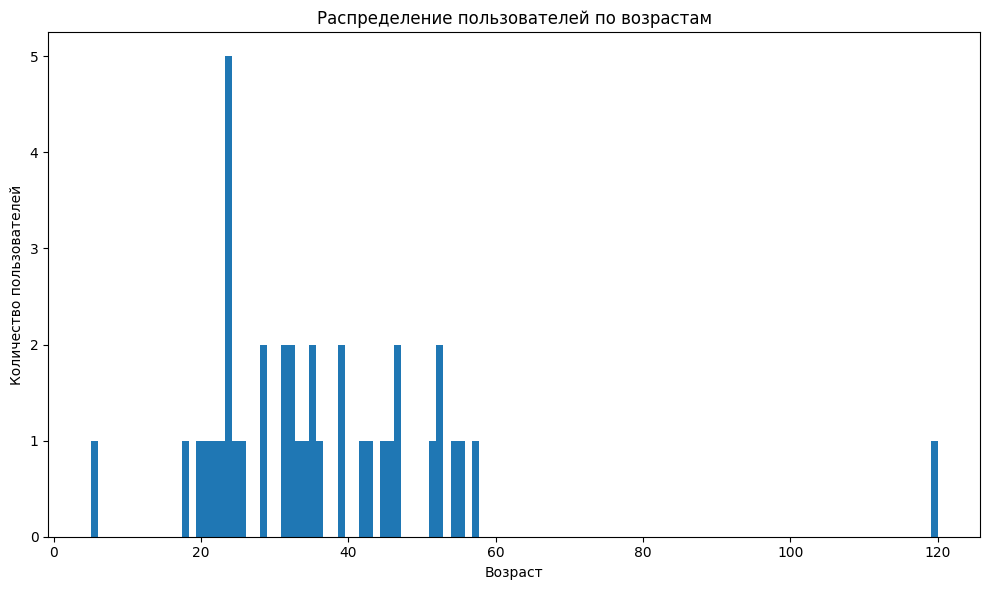

In [89]:
import numpy as np

file='S02-hw-dataset.csv'
data = pd.read_csv(file, sep=',')
plt.figure(figsize=(10, 6))
plt.hist(data['age'], bins=120)
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по возрастам')
plt.tight_layout()
plt.savefig('figures/my_plot.png')
plt.show()

C:\Users\-\AppData\Local\Temp\ipykernel_16332\2546421845.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=country_labels)


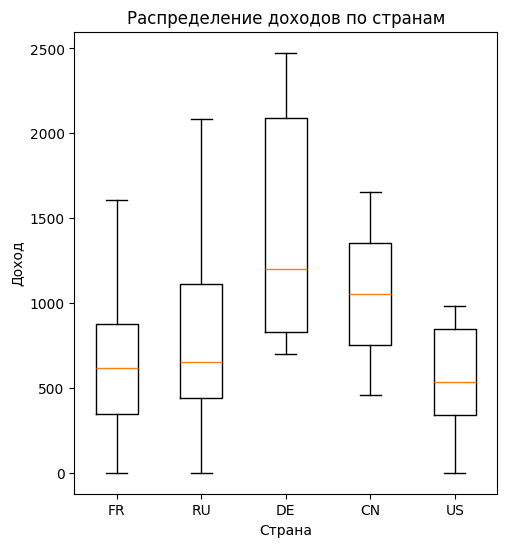

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file = 'S02-hw-dataset.csv'
data = pd.read_csv(file, sep=',')


# Создаем boxplot для доходов по странам
plt.figure(figsize=(12, 6))

# Вариант 1: Стандартный boxplot
plt.subplot(1, 2, 1)
boxplot_data = []
countries = data['country'].unique()
country_labels = []

for country in countries:
    country_data = data[data['country'] == country]['revenue']
    if len(country_data) > 0:
        boxplot_data.append(country_data.values)
        country_labels.append(country)

plt.boxplot(boxplot_data, labels=country_labels)
plt.xlabel('Страна')
plt.ylabel('Доход')
plt.title('Распределение доходов по странам')
plt.show()

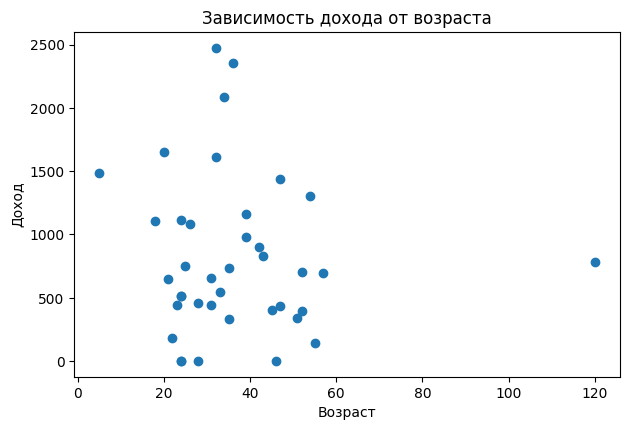

In [91]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.scatter(data['age'], data['revenue'])
plt.xlabel('Возраст')
plt.ylabel('Доход')
plt.title('Зависимость дохода от возраста')
plt.tight_layout()
plt.show()